# **What pricing strategies can we implement to maximize revenue?**
### Introduction to Shopee's Current Pricing Conditions

Shopee operates in a highly competitive e-commerce landscape characterized by diverse product categories and a customer-to-customer (C2C) marketplace model. This structure allows individual sellers to compete on the same platform, often offering similar products at varying price points. The platform's low entry barriers for sellers and wide consumer reach create a dynamic pricing environment where competition is fierce and consumer expectations for affordable pricing are high.

In this context, Shopee faces the challenge of balancing seller autonomy in pricing with maintaining an optimal price perception for buyers. Pricing must account for the wide variation in product demand, seller strategies, and consumer price sensitivity across different categories. Additionally, external competition from other e-commerce giants like Lazada and Amazon intensifies the need for pricing strategies that are not only competitive but also revenue-maximizing for both sellers and the platform itself.

 Below, we explore a comprehensive approach to implementing a pricing strategy that can achieve these goals effectively.

<br>

---

The success of a pricing strategy project for Shopee involves collaboration among various stakeholders. Below is a list of key stakeholders and their roles:

### **Internal Stakeholders**
1. **Algorithm Development Team**
   - Responsible for designing and maintaining dynamic pricing models.
   - Develops machine learning algorithms to analyze price elasticity, competition, and customer behavior.
   - Ensures real-time implementation of pricing adjustments.

2. **Data Analytics Team**
   - Collects, cleans, and analyzes sales data, customer behavior, and market trends.
   - Provides insights into price elasticity and customer segmentation.
   - Supports decision-making by forecasting the impact of pricing strategies.

3. **Product Management Team**
   - Aligns pricing tools and features with the platform's overall strategy.
   - Manages the integration of pricing algorithms into the user interface for both buyers and sellers.
   - Ensures the pricing features enhance user experience.

4. **Marketing and Promotions Team**
   - Designs campaigns and discounts that complement the pricing strategy.
   - Ensures promotional activities align with customer price sensitivity and seasonal demand.

5. **Sales and Seller Relationship Team**
   - Engages with sellers to educate them on the benefits of dynamic pricing.
   - Provides support for sellers in understanding and optimizing their pricing strategies.
   - Gathers seller feedback to refine pricing tools and strategies.

6. **Platform Operations Team**
   - Monitors and ensures smooth implementation of the pricing strategy across the platform.
   - Resolves technical and operational challenges that arise from pricing changes.

<br>

---

### **External Stakeholders**
1. **Sellers**
   - Actively participate in the pricing ecosystem by adopting dynamic pricing suggestions or setting competitive prices.
   - Provide feedback on pricing tools and their impact on sales.

2. **Buyers (Customers)**
   - Serve as the end-users whose purchasing behavior influences pricing strategy outcomes.
   - Offer feedback on price perception and satisfaction.

By ensuring clear communication, alignment of goals, and collaboration among these stakeholders, Shopee can create and sustain an effective pricing strategy that maximizes revenue while maintaining a competitive edge.

<br>

---
### **Limitation Note**  
Due to the limited availability of data, this project will focus exclusively on potential pricing strategies within the Shopee platform. External market factors and pricing strategies from other platforms will not be covered in this analysis.

<br>

---

### **Key Objective**
To identify pricing strategies within the Shopee platform that can maximize revenue by leveraging insights into seller competition, product categories, and customer behavior.

This objective focuses on maximizing Shopee's Revenue via **Gross Merchandise Value (GMV)**, a key metric in e-commerce. **GMV** represents the total value of goods sold through the platform over a given period, calculated as:

$$
\text{GMV} = \text{Total Items Sold} \times \text{Average Selling Price (ASP)}
$$

Maximizing GMV involves a strategic balance between increasing the number of transactions and optimizing pricing to enhance the overall value of sales. A well-designed pricing strategy that considers customer price sensitivity, product competition, and elasticity will help Shopee achieve higher GMV, driving platform growth and seller success.

---

### **Pricing Strategy Assumptions**

1. **Discount-Driven Pricing Approach**:
   - Since Shopee **cannot directly control the product prices** (as they are set by the sellers), the primary lever for influencing pricing and demand is through **applying platform-wide or targeted discounts**.
   - Discounts can be applied dynamically based on insights from customer segments (e.g., loyalty tiers), product performance, and competitive analysis.

2. **Segmented Discount Elasticity**:
   - The sensitivity of demand to discounts (Discount Elasticity of Demand, DED) varies across **customer segments** (e.g., budget shoppers vs. premium buyers) and **product categories** (e.g., electronics vs. fashion).
   - DED will be estimated and updated regularly for each segment to capture the changing responsiveness of customers to discounts. This allows Shopee to tailor discount strategies to maximize demand.

3. **Group Products by Sensitivity**:
   - Given the large and granular product catalog (10k+ products), it is impractical to set individual discount levels for each product. Instead, products will be **grouped into clusters** based on characteristics like category, price range, and historical sales performance.
   - Each cluster will have a representative DED, and discount strategies will be applied at the **cluster level** rather than the individual product level.

4. **Revenue Optimization Through Discount Forecasting**:
   - Instead of adjusting the product price directly, Shopee will forecast a time series of optimal discount levels using a combination of demand forecasting models and optimization techniques.
   - The forecasted discount levels aim to **maximize the GMV** while considering constraints like campaign budgets, discount limits, and seller agreements.

5. **Campaign Days and Promotion Strategy**:
   - During major sales events (e.g., 11.11, Black Friday), customers are generally more responsive to discounts. The model will incorporate **campaign day indicators** to increase the forecasted discount levels for these periods to boost transaction volume and GMV.
   - Shopee may also offer tiered discounts (e.g., higher discounts for premium loyalty tiers) to incentivize purchases from high-value customers.

6. **Data-Driven Feedback Loop**:
   - The model will include a feedback mechanism that continuously monitors the impact of discounts on demand and updates the DED estimates accordingly. This allows Shopee to refine its discount strategies and respond quickly to market changes.


## Part 1: Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
products_df = pd.read_csv('../Cleaned_Datasets/products.csv')
orders_df = pd.read_csv('../Cleaned_Datasets/orders.csv')
customers_df = pd.read_csv('../Cleaned_Datasets/customers_sg.csv')

In [3]:
orders_df.columns

Index(['order_id', 'order_time', 'product_id', 'customer_id', 'is_campaign',
       'additional_discount', 'campaign_name'],
      dtype='object')

In [4]:
orders_df.head(5)

,order_id,order_time,product_id,customer_id,is_campaign,additional_discount,campaign_name
0,1,2019-12-25 17:01:00,16498,299,True,65.0,Other Seasonal Sales Date
1,2,2019-12-01 20:14:00,8523,299,False,0.0,NaN
2,3,2019-11-21 09:53:00,7396,299,False,0.0,NaN
3,4,2019-11-29 08:09:00,2446,299,True,40.0,High Priority Seasonal Sales Date
4,5,2019-11-08 09:11:00,9353,299,False,0.0,NaN


#### **Data Preperation**

In [5]:
products_df = products_df[['product_id',
                     'title',
                     'price_ori',
                     'price_actual',
                     'item_rating',
                     'favorite',
                     'total_sold',
                     'main_category',
                     'mid_category',
                     'sub_category',]]

In [6]:
orders_df = pd.merge(orders_df, products_df, how='left', on='product_id')

orders_df['checkout_price'] = np.where(
    orders_df['additional_discount'] > 0,
    orders_df['price_ori']*(1 - orders_df['additional_discount']/100),
    orders_df['price_actual']
)

orders_df['total_discount'] = (orders_df['price_ori'] - orders_df['checkout_price'])/orders_df['price_ori'] * 100

# Drop 'price_actual' and 'title' columns
orders = orders_df.drop(columns=['price_actual', 'title'])

In [7]:
# Extract unique main categories
main_categories = products_df['main_category'].unique().tolist()
print(main_categories)

["Women's Bags", 'Home Appliances', 'Women Clothes', 'Cameras & Drones', 'Others', 'Mobile & Accessories', 'Men Clothes', "Men's Bags & Wallets", 'Watches', 'Health & Beauty', 'Baby & Toys', 'Home & Living', 'Groceries & Pets', 'Men Shoes', 'Computer & Accessories', 'Games, Books & Hobbies', 'Tickets & Vouchers', 'Automotive', 'Women Shoes', 'Fashion Accessories', 'Sports & Outdoor', 'Travel & Luggage', 'Gaming & Consoles']


In [8]:
len(main_categories)

23

## Plotting Price Variability Within Each Main Category

1. **Skewed Price Distributions**:
   - Most categories have a highly **right-skewed distribution**, where the majority of products are clustered in the lower price ranges, with a few products at significantly higher prices.
   - This is typical in e-commerce, where affordable products make up the bulk of each category, and only a few premium products are available at higher prices.

2. **Low Price Variability in Some Categories**:
   - Categories like **"Women's Clothes," "Men's Shoes," "Women's Shoes,"** and **"Fashion Accessories"** show very low price ranges, indicating that most products in these categories are relatively low-cost.
   - Categories with low price variability might indicate that customers are highly price-sensitive, and sellers are pricing competitively within a narrow range.

3. **High Price Variability in Certain Categories**:
   - Categories such as **"Cameras & Drones," "Travel & Luggage," "Health & Beauty,"** and **"Computer & Accessories"** have broader price ranges, showing a mix of low-cost and high-cost items.
   - The wide price range in these categories might suggest a mix of entry-level and premium products, catering to different customer segments with varying price sensitivities.

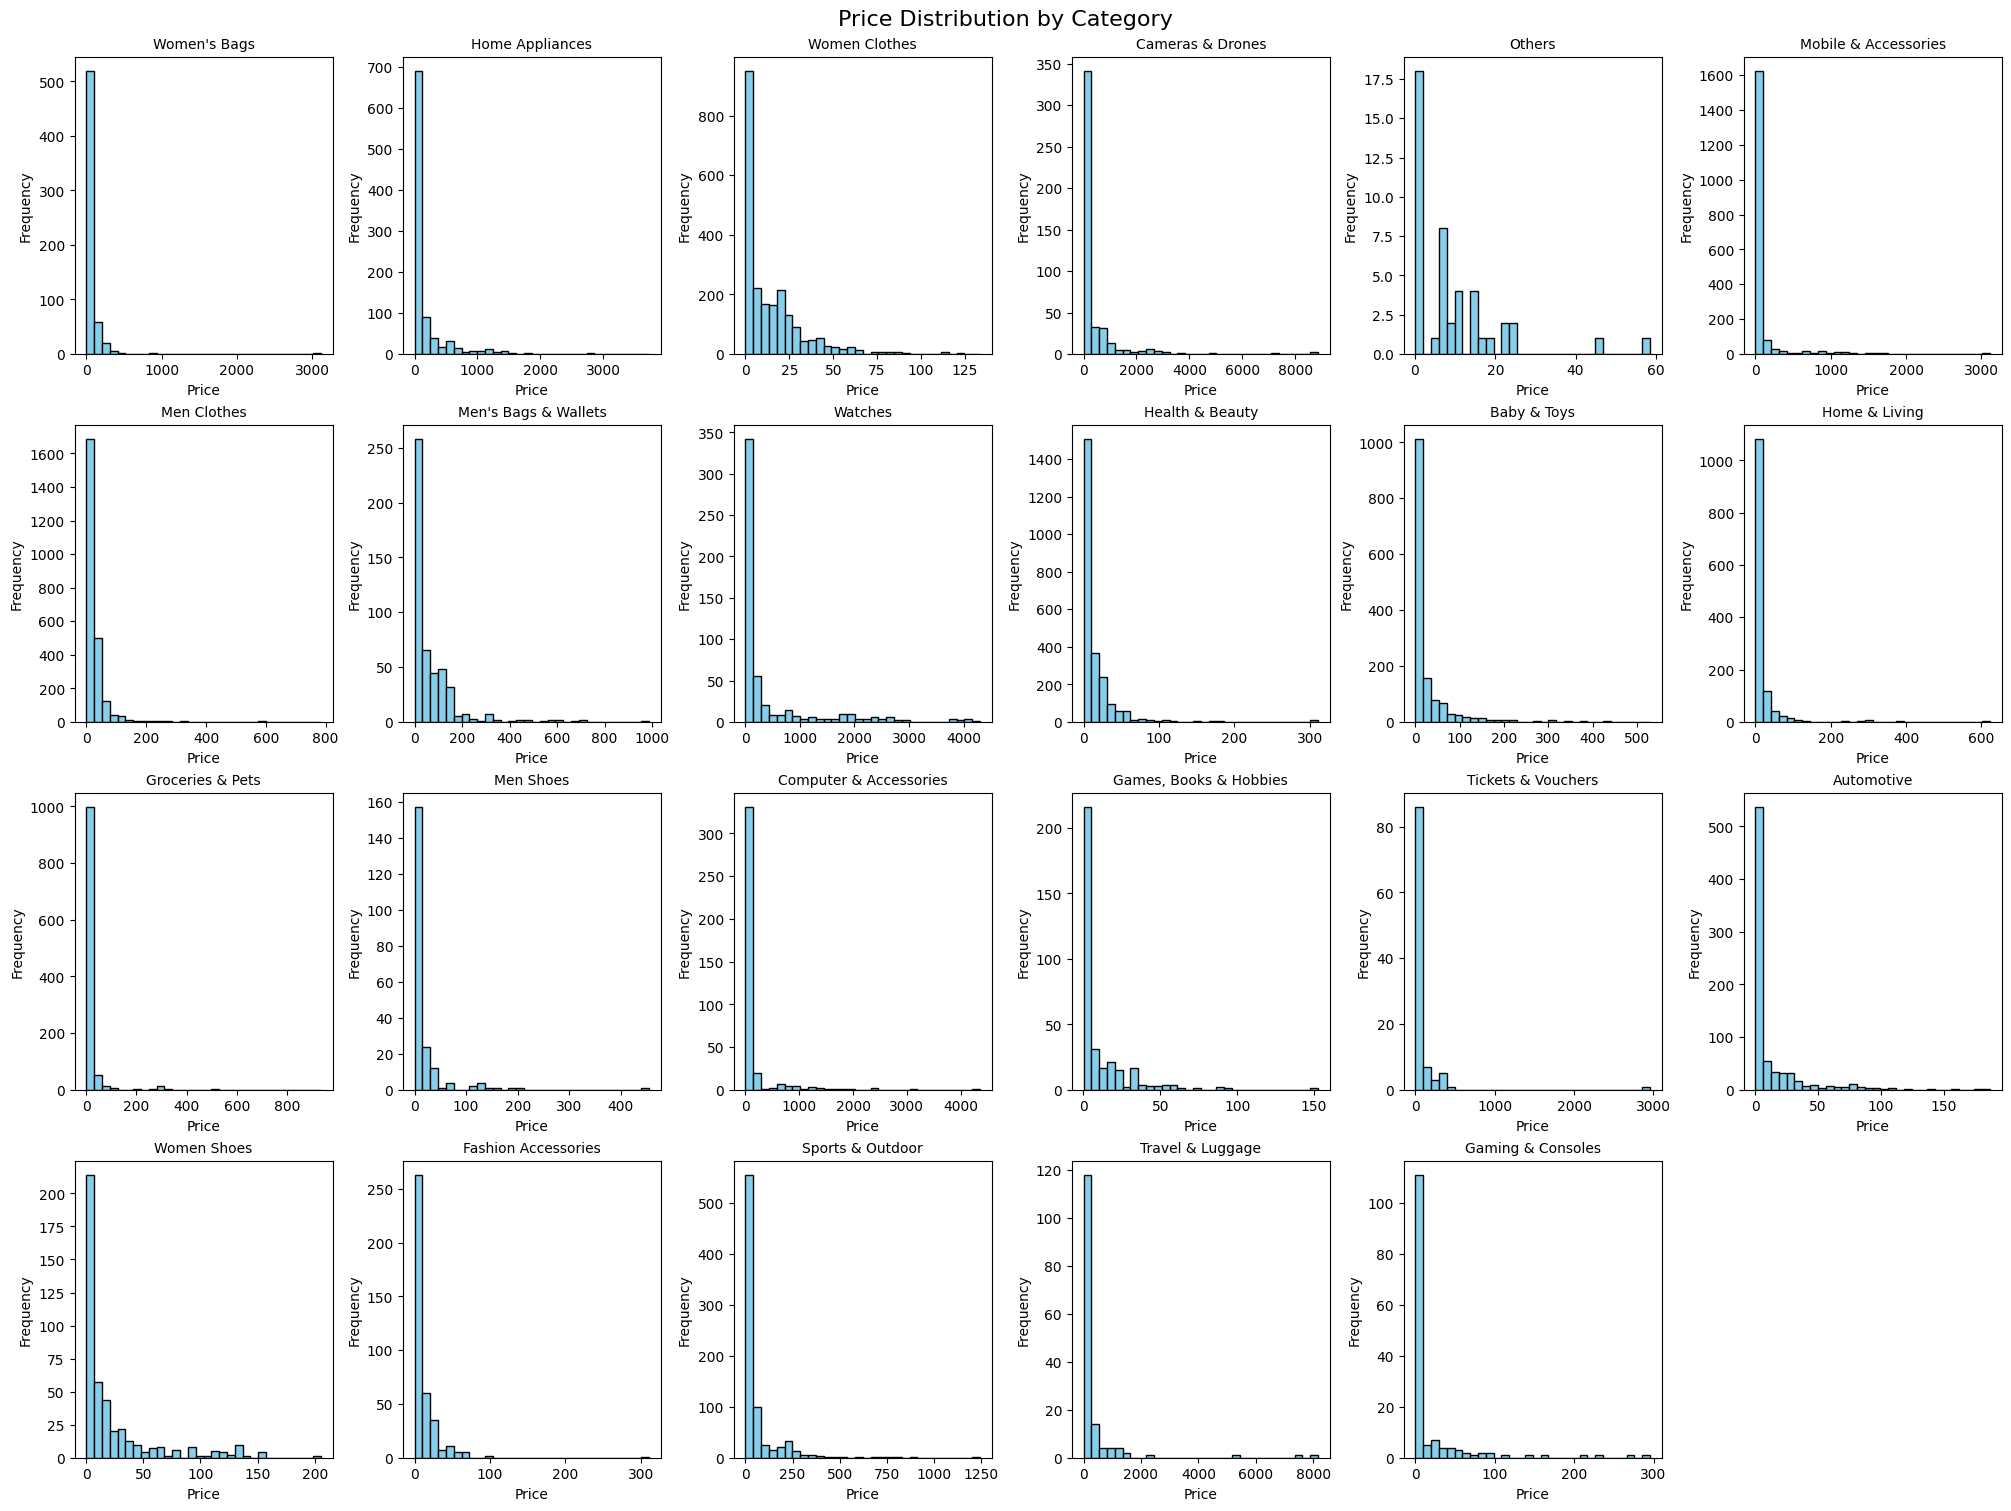

In [9]:
import matplotlib.pyplot as plt

# Set up the grid for subplots
fig, axes = plt.subplots(4, 6, figsize=(20, 15), constrained_layout=True)
fig.suptitle('Price Distribution by Category', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each main category and plot the histogram
for i, category in enumerate(main_categories):
    category_data = products_df[products_df['main_category'] == category]
    
    # Plot histogram on each subplot
    axes[i].hist(category_data['price_ori'], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{category}', fontsize=10)
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots (if there are fewer than 24 categories)
for j in range(len(main_categories), len(axes)):
    axes[j].axis('off')

plt.show()

## Price Elasticity Demand Concept as Key Determiner for Dynamic Pricing
---

### **What is PED?**
Price Elasticity of Demand (PED) measures how sensitive customer demand is to changes in price. It provides a quantitative understanding of how price adjustments (e.g., discounts) affect the quantity sold.  

**Formula for PED:**
$$
PED = \frac{\%\ \text{Change in Quantity Demanded}}{\%\ \text{Change in Price}}
$$

Where:

- **% Change in Quantity Demanded**:
$$
\%\ \text{Change in Quantity Demanded} = \frac{\text{New Quantity} - \text{Old Quantity}}{\text{Old Quantity}} \times 100
$$

- **% Change in Price**:
$$
\%\ \text{Change in Price} = \frac{\text{New Price} - \text{Old Price}}{\text{Old Price}} \times 100
$$

---

### **Interpreting PED Values**
The value of PED determines whether demand is elastic, inelastic, or unit elastic:

1. **Elastic Demand (PED < -1):**  
   - Demand is highly sensitive to price changes.  
   - Example: If PED = -2, a 1% decrease in price leads to a 2% increase in demand.  
   - **Good for Dynamic Pricing:** Discounts can significantly boost demand and revenue.

2. **Inelastic Demand (-1 ≤ PED < 0):**  
   - Demand is less responsive to price changes.  
   - Example: If PED = -0.5, a 1% decrease in price leads to only a 0.5% increase in demand.  
   - **Not Ideal for Discounts:** Lowering prices may not significantly increase demand.

3. **Unit Elastic Demand (PED = -1):**  
   - Demand changes proportionally to price.  
   - Example: A 1% decrease in price leads to a 1% increase in demand.  
   - **Moderate:** Discounts may balance demand growth and revenue impact.

4. **Zero Elasticity (PED = 0):**  
   - Demand does not change regardless of price (e.g., necessities).  

---

### **What is Considered a Good PED Value?**
- **For Discounts to Be Effective:** A good PED value is typically more elastic (\(PED < -1\)), as it indicates that discounts will lead to significant demand increases.  
- **For Revenue Maximization Without Excessive Discounts:** Products with \(PED\) slightly less than \(-1\) are ideal because they provide predictable demand growth without excessive price reductions.  

---

### **How to Assess PED**
To effectively monitor and update PED calculations:

1. **Frequency of Assessment:**  
   - **Monthly or Weekly** assessments are ideal for most products, depending on:
     - **Product Volatility:** Seasonal or fast-moving products may require weekly updates.
     - **Campaigns:** Evaluate PED immediately after major sales events (e.g., mega sales).
   - Products with stable demand can have PED assessed quarterly.

2. **Actionable Insights:**  
   - Combine PED with demand forecasts to predict the impact of proposed discounts.  
   - Monitor PED trends over time to detect changes in customer behavior and adapt pricing strategies accordingly.

---

### **Challenges in PED Assessment**
- **Data Noise:** Discounts applied across campaigns or multiple categories may obscure true PED.  
- **Sufficient Data Volume:** PED calculations require significant historical data to be reliable, particularly for less popular products.  
- **Dynamic PED:** Elasticity may change over time, especially with market trends, competitive pressures, or new product launches.

---


## PED Calculation for Each Category
Due to the current limitations in available data, we calculate the Price Elasticity of Demand (PED) at the `mid_category` and `main_category` levels. This approach assumes that products within these categories exhibit similar price sensitivity, allowing us to aggregate and generalize demand behavior for analysis. 

However, in an ideal scenario with more granular data, PED would be calculated at the individual product level. This would enable us to precisely identify which products have elastic or inelastic demand, providing a more tailored and accurate understanding of pricing dynamics. 

For now, this category-based approach serves as a practical approximation, while acknowledging that product-level PED is the preferred method in practice.

We will use this Price Elasticity of Demand (PED) as a key metric to identify and prioritize products suitable for dynamic pricing or "discount adjustment." Given the vast number of products on Shopee, it's crucial to focus on those that are likely to benefit most from price adjustments to optimize revenue.

PED is hoped to enable us to classify products into two main categories:
- **Inelastic Demand Products:** Items like automotive, which are less affected by discounts, as their demand remains relatively stable regardless of price changes. For such products, applying dynamic pricing might not yield significant results.
- **Elastic Demand Products:** Items like seasonal or high-demand products (e.g., Labubu collectibles), where demand can fluctuate significantly with price changes. These are more suitable for dynamic pricing as strategic discounts can drive substantial demand and revenue growth.

In [10]:
import pandas as pd

# Assuming orders_df contains 'product_id', 'main_category', 'price', 'order_time', and 'order_id'
# Convert order_time to datetime if it's not already
orders_df['order_time'] = pd.to_datetime(orders_df['order_time'])

# Step 1: Add a month column to group data by month
orders_df['order_month'] = orders_df['order_time'].dt.to_period('M')

# Step 2: Calculate monthly demand and average price for each product
# Group by product_id and order_month to get monthly demand and average price
monthly_data = orders_df.groupby(['mid_category', 'main_category', 'order_month']).agg(
    avg_price=('checkout_price', 'mean'),
    monthly_demand=('order_id', 'count')  # Count of orders as a proxy for quantity sold
).reset_index()

# Step 3: Calculate monthly changes in price and demand for each product
# Sort by product_id and month to make change calculation easier
monthly_data = monthly_data.sort_values(by=['mid_category', 'order_month'])

# Calculate percentage change in price and demand month-over-month for each product
monthly_data['price_change_pct'] = monthly_data.groupby('mid_category')['avg_price'].pct_change()
monthly_data['demand_change_pct'] = monthly_data.groupby('mid_category')['monthly_demand'].pct_change()

# Step 4: Calculate PED for each product for each month (avoiding division by zero)
monthly_data['ped'] = monthly_data.apply(
    lambda row: row['demand_change_pct'] / row['price_change_pct'] 
    if row['price_change_pct'] != 0 else None, axis=1
)

# Step 5: Remove NaN values in PED to keep only valid calculations
monthly_data = monthly_data.dropna(subset=['ped'])

# Step 6: Calculate average PED by category
category_ped = monthly_data.groupby('main_category')['ped'].mean().reset_index()
category_ped.columns = ['main_category', 'average_ped']

# Display the average PED for each category
print(category_ped)

             main_category  average_ped
0               Automotive    -0.133282
1              Baby & Toys    -0.645166
2         Cameras & Drones    -0.403698
3   Computer & Accessories     0.220889
4      Fashion Accessories   -73.810310
5   Games, Books & Hobbies    -1.028182
6        Gaming & Consoles     0.517856
7         Groceries & Pets    -0.979599
8          Health & Beauty     0.931601
9            Home & Living    -0.814312
10         Home Appliances   -51.690935
11             Men Clothes    -0.288616
12               Men Shoes     0.693548
13    Men's Bags & Wallets     1.606231
14    Mobile & Accessories   -20.877906
15                  Others     1.860752
16        Sports & Outdoor    -0.821416
17      Tickets & Vouchers    -0.017044
18        Travel & Luggage    -0.137548
19                 Watches    -1.482571
20           Women Clothes    -0.893211
21             Women Shoes     3.501462
22            Women's Bags     0.781612


---

### **Key Observations**

1. **Categories with Elastic Demand (PED < -1):**
   - These categories are highly responsive to price changes, making them ideal for discount-driven strategies.
   - **Examples:**
     - **Watches (-1.482):** Discounts are effective in driving demand, indicating high sensitivity to price changes.
     - **Games, Books & Hobbies (-1.028):** Similar behavior; demand can significantly increase with appropriate discounts.

2. **Categories with Inelastic Demand (PED > -1 and close to 0):**
   - Demand for these categories is relatively unaffected by price changes.
   - **Examples:**
     - **Automotive (-0.133):** Discounts have minimal impact on sales; focus should be on other promotional methods like bundling or value-added services.
     - **Travel & Luggage (-0.137):** Similarly, discounts may not yield significant results.
     - **Tickets & Vouchers (-0.017):** This extremely inelastic demand suggests minimal price sensitivity.

3. **Categories with Positive PED:**
   - Positive PED values indicate potential data issues or demand behaving counterintuitively (e.g., increasing price leads to increased demand, often due to luxury or status items).
   - **Examples:**
     - **Fashion Accessories (-73.81):** Likely a data anomaly or miscalculation; needs further investigation.
     - **Health & Beauty (0.931):** Suggests price increases may increase demand, possibly reflecting perceived value or premium positioning.
     - **Men's Bags & Wallets (1.606):** Positive PED here suggests discounts may not align with customer expectations.

4. **Outliers or Data Anomalies:**
   - **Fashion Accessories (-73.81):** Such an extreme negative value suggests an error in the PED calculation or an unusual sales event.
   - **Home Appliances (-51.69):** Similarly, an extreme PED value may not reflect actual customer behavior.

---

### **Strategic Recommendations**

#### **Elastic Categories (Focus on Discounts):**
   - **Watches, Games, Books & Hobbies, Baby & Toys, Home & Living:**  
     - Apply targeted discounts during campaigns to boost sales.
     - Use PED to test various discount levels and optimize for maximum revenue.

#### **Inelastic Categories (Focus on Alternatives):**
   - **Automotive, Travel & Luggage, Tickets & Vouchers:**
     - Deprioritize heavy discounts; focus instead on bundling, cross-selling, or loyalty rewards.
     - Explore campaigns emphasizing product quality, durability, or other value drivers.

#### **Categories with Positive PED (Investigate Further):**
   - **Fashion Accessories, Men's Bags & Wallets, Health & Beauty:**  
     - Revalidate calculations for these categories.
     - Positive PED may indicate luxury or premium positioning; discounts may dilute brand perception.

#### **Address Anomalies:**

   - Extreme PED values, such as **Fashion Accessories (-73.81)** and **Home Appliances (-51.69)**, might not be accurate due to the current methodology, which calculates PED at the `mid_category` level rather than at the product level. These anomalies could result from aggregated data masking more granular demand behaviors.
   - For now, we will acknowledge these potential inaccuracies but proceed with the analysis based on reasonable PED values for other categories.
   - Future improvements should focus on refining PED calculations at more granular levels (e.g., individual products or subcategories) to provide a clearer picture of elasticity.




### **Possible Factors Affecting Price Elasticity**

1. **Product Type and Necessity:**  
   - Essential items, such as groceries or basic clothing, are inelastic because they are non-negotiable purchases, regardless of price changes.  
   - Luxury or discretionary items, like branded bags or electronics, are more elastic since consumers can delay or avoid purchasing them if prices increase.

2. **Availability of Substitutes:**  
   - Products with readily available alternatives (e.g., generic brands or similar products) have elastic demand, as customers can easily switch to cheaper options.  
   - Products with few or no substitutes, such as niche or patented items, tend to have inelastic demand.

3. **Brand Loyalty:**  
   - Consumers loyal to a specific brand are less likely to switch, even if prices increase, making demand inelastic.  
   - Conversely, in markets with weak brand loyalty, consumers are more likely to respond to price changes, leading to greater elasticity.

4. **Customer Segments:**  
   - Lower-income customers are more price-sensitive and exhibit elastic demand because price increases significantly impact their purchasing decisions.  
   - New customers are also more sensitive to discounts as they are still exploring options and are not yet committed to a brand or product.

5. **Seasonal Demand:**  
   - During peak periods (e.g., holidays, festivals), demand for seasonal products like decorations or gifts becomes inelastic because consumers prioritize availability over price.  
   - In off-peak times, the same products may see more elastic demand as consumers are more sensitive to price changes.

6. **Perceived Value:**  
   - High-quality or premium products often have inelastic demand because customers perceive them as worth the price, even if it increases.  
   - If customers associate higher prices with better quality, demand may even rise with price (positive elasticity).

7. **Discounts and Promotions:**  
   - Discounts reduce the effective price, increasing elasticity as customers are drawn to the perceived value.  
   - Limited-time offers create urgency, further boosting demand responsiveness to price changes.

8. **Competitive Factors:**  
   - In highly competitive markets, where consumers can easily compare prices, demand becomes more elastic.  
   - In markets with little competition, such as monopolies, demand tends to be inelastic as customers have fewer alternatives.

9. **Inventory and Supply Constraints:**  
   - Scarcity (e.g., limited stock or exclusive items) reduces elasticity because customers are willing to pay more to secure the product.  
   - When supply is abundant, demand becomes more elastic as customers feel less urgency to purchase.

10. **Consumer Behavior and Trends:**  
   - Social proof, such as recommendations from influencers or trending products, can make demand more elastic as customers respond quickly to price changes.  
   - Impulse purchases, often for low-cost or trending items, are more sensitive to discounts and promotions.

11. **Geographic Factors:**  
   - In regions with lower income levels, demand is more elastic because customers are more affected by price changes.  
   - Shipping costs or availability of local alternatives can also influence elasticity, especially for international or imported goods.

12. **Economic Conditions:**  
   - During economic downturns, consumers become more price-sensitive, increasing elasticity for non-essential goods.  
   - In periods of economic growth, higher disposable income makes demand for luxury or premium products less elastic, as customers are willing to pay more.

---

## **Dynamic Pricing Model**

Dynamic pricing is a strategic approach to adjusting prices or discounts based on customer behavior, product characteristics, and market conditions. In Shopee's context, dynamic pricing is implemented by dynamically assigning discounts to products rather than directly changing product prices, as sellers retain control over base prices. This system enables Shopee to influence demand and optimize revenue during flash sales or campaigns while respecting operational constraints.


### **1. Rationale for Dynamic Pricing via Discounts**

#### **a. Shopee’s Operational Constraint**
- Shopee cannot directly control product prices, as they are set by the sellers.
- Instead, Shopee applies platform-driven discounts during flash sales, campaigns, and promotional events to incentivize purchases.

#### **b. Flexibility with Discounts**
- Discounts can be dynamically adjusted to align with demand patterns, customer preferences, and available budget constraints.
- The approach allows Shopee to optimize sales without altering seller-defined pricing structures.

#### **c. Customer-Centric Marketing**
- Shopee’s ability to segment customers based on purchase behavior enables tailored discount strategies.
- For example:
  - Offer higher discounts to price-sensitive customer segments.
  - Target loyal customers with exclusive deals on preferred product categories.

### **2. Predefined Customers and Products**

#### **a. Customers**
- Customers are predefined based on segmentation models derived from clustering algorithms applied to historical purchase data.
- Segmentation attributes include:
  - **Discount Sensitivity:** How likely a customer is to purchase given a discount.
  - **Product Preferences:** Preferred categories or specific products based on past behavior.
  - **Spending Capacity:** Average basket size or purchasing power.

#### **b. Products**
- Products for flash sales are selected using criteria such as:
  - **High Price Elasticity of Demand (PED):** Products with elastic demand are more responsive to discounts.
  - **Stock Levels:** High inventory products are prioritized to reduce overstock.
  - **Seasonality and Trends:** Items trending or in season are preferred for flash sales.
  - **Deal Negotiations:** Sellers offering better terms for discounts may have their products prioritized.

#### **c. Dynamic Inputs**
- The predefined customer and product datasets can be updated by Shopee’s marketing team, allowing flexibility to reflect new customer segments or product deals.


### **3. Reinforcement Learning (RL) for Dynamic Pricing**

#### **a. Why RL?**
- **Sequential Decision-Making:** RL excels at optimizing decisions over time, such as allocating discounts across multiple products while considering evolving constraints (e.g., budget and stock levels).
- **Adaptability:** RL learns from customer responses and adjusts strategies dynamically, outperforming static rule-based methods.
- **Trade-Off Management:** RL inherently balances competing objectives, such as maximizing revenue while staying within budget.


#### **b. RL Framework**

1. **State Space:**
   - Represents the current environment, including:
     - Product prices and stock levels.
     - Remaining discount budget.
     - Customer preferences and discount sensitivity.

2. **Action Space:**
   - Defines the discount levels (e.g., 0%, 10%, 20%, 30%, 40%) for each product in the flash sale.

3. **Reward Function:**
   - Balances revenue generation and budget utilization:
     \[
     \text{Reward} = \text{Revenue} - \text{Discount Cost}
     \]
   - Includes penalties for overspending the budget or failing to utilize stock efficiently.

4. **Environment Dynamics:**
   - Simulates purchases using customer probability models based on:
     - Base likelihood of purchase (intrinsic interest).
     - Sensitivity to discounts.
     - Boosts for preferred products/categories.

#### **c. RL Implementation**

1. **Model Selection:**
   - Use Proximal Policy Optimization (PPO) for its robustness and ability to handle high-dimensional action spaces (e.g., discounts for multiple products).

2. **Training Process:**
   - Predefined customer and product datasets serve as the input to simulate flash sale scenarios.
   - RL is trained over multiple episodes, optimizing discount strategies by exploring and exploiting actions that maximize cumulative rewards.

3. **Evaluation:**
   - Compare RL strategies to rule-based benchmarks (e.g., uniform discounts across all products).
   - Metrics include:
     - Total revenue.
     - Budget utilization.
     - Stock clearance efficiency.

---


In [11]:
def uniform_discount(products, discount_level=10):
    total_revenue = 0
    total_discount_cost = 0
    
    for product in products:
        # Simulate purchase probability
        prob = product['base_prob']  # Use base probability only
        purchases = np.random.binomial(product['stock'], prob)
        revenue = purchases * product['price'] * (1 - discount_level / 100)
        discount_cost = purchases * product['price'] * (discount_level / 100)
        
        total_revenue += revenue
        total_discount_cost += discount_cost
    
    return total_revenue, total_discount_cost

In [12]:
import gym
from gym import spaces
import numpy as np

class FlashSaleEnv(gym.Env):
    def __init__(self, products, customer_segments, budget):
        super(FlashSaleEnv, self).__init__()
        
        # Initialize product data
        self.products = products
        self.customer_segments = customer_segments
        self.budget = budget
        self.initial_budget = budget
        
        # Action space: discount levels (0%, 10%, 20%, 30%, 40%)
        self.action_space = spaces.MultiDiscrete([5] * len(products))
        
        # Observation space: price, stock, remaining budget
        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(len(products) * 2 + 1,), dtype=np.float32
        )
        
        # Initialize state
        self.state = None
        self.total_revenue = 0  # Track total revenue
        self.reset()
    
    def reset(self):
        # Reset the environment to its initial state
        self.budget = self.initial_budget
        self.total_revenue = 0  # Reset total revenue
        for product in self.products:
            product['stock'] = product['initial_stock']  # Reset stock to initial stock
        self.state = np.concatenate([
            np.array([product['price'] for product in self.products]),  # Prices
            np.array([product['stock'] for product in self.products]),  # Stock
            [self.budget],  # Remaining budget
        ])
        return self.state

    def step(self, action):
        """
        Apply the given action (discounts) to the products and compute rewards.
        """
        discounts = np.array(action) * 10  # Convert action indices to percentage discounts (e.g., index 3 → 30%)
        revenue = 0
        discount_cost = 0

        # Update product states
        for i, product in enumerate(self.products):
            if product['stock'] > 0:
                # Get customer segment data
                segment = self.customer_segments[product['customer_segment']]
                base_prob = segment['base_prob']
                sensitivity = segment['sensitivity']

                # Calculate purchase probability
                prob = base_prob + (sensitivity * discounts[i] / 100)

                # Boost probability if product is in the customer's preferred category
                if product['category'] in segment['preferred_category']:
                    prob += 0.10  # Add a preference boost (10%)

                prob = min(prob, 1.0)  # Cap probability at 100%

                # Simulate purchases using binomial distribution
                purchases = np.random.binomial(product['stock'], prob)
                product['stock'] -= purchases
                revenue += purchases * product['price'] * (1 - discounts[i] / 100)
                discount_cost += purchases * product['price'] * (discounts[i] / 100)

        # Check if the budget allows the discount cost
        if self.budget - discount_cost < 0:
            reward = -1000  # Large penalty for exceeding budget
            done = True
        else:
            # Update total revenue and budget
            self.total_revenue += revenue
            self.budget -= discount_cost

            # Calculate reward
            reward = revenue - discount_cost
            done = all(product['stock'] == 0 for product in self.products) or self.budget <= 0

        # Update state
        self.state = np.concatenate([
            np.array([product['price'] for product in self.products]),
            np.array([product['stock'] for product in self.products]),
            [self.budget],
        ])

        return self.state, reward, done, {}

In [13]:
# Define products
products = [
    {'price': 100, 'initial_stock': 10, 'category': 0, 'customer_segment': 0},
    {'price': 200, 'initial_stock': 5, 'category': 1, 'customer_segment': 1},
    {'price': 150, 'initial_stock': 8, 'category': 2, 'customer_segment': 2},
    {'price': 50,  'initial_stock': 20, 'category': 3, 'customer_segment': 0},
    {'price': 500, 'initial_stock': 2, 'category': 4, 'customer_segment': 1},
    {'price': 75,  'initial_stock': 15, 'category': 5, 'customer_segment': 2},
    {'price': 300, 'initial_stock': 4, 'category': 6, 'customer_segment': 3},
]

# Define customer segments
customer_segments = [
    {'base_prob': 0.05, 'sensitivity': 0.02, 'preferred_category': [0, 3]},  # Segment 0 prefers Electronics & Accessories
    {'base_prob': 0.10, 'sensitivity': 0.04, 'preferred_category': [1, 4]},  # Segment 1 prefers Appliances & Luxury Items
    {'base_prob': 0.20, 'sensitivity': 0.05, 'preferred_category': [2, 5]},  # Segment 2 prefers Clothing & Books
    {'base_prob': 0.30, 'sensitivity': 0.07, 'preferred_category': [6]},     # Segment 3 prefers Furniture
]

In [14]:
from stable_baselines3 import PPO

# Initialize the environment
budget = 1000  # Set a budget for discounts
env = FlashSaleEnv(products, customer_segments, budget)

# Initialize and train the PPO model
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/opt/homebrew/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 5.12     |
|    ep_rew_mean     | 1.83e+03 |
| time/              |          |
|    fps             | 1487     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.69        |
|    ep_rew_mean          | 1.85e+03    |
| time/                   |             |
|    fps                  | 1158        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014091033 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -11.3       |
|    explained_variance   | 0.000138    |
|    learning_rate        | 0.

In [15]:
# Test the trained PPO model
state = env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(state)
    state, reward, done, _ = env.step(action)
    total_reward += reward
    print(f"Action: {action}, Reward: {reward}, State: {state}")

# Print total revenue and rewards
print(f"Total Revenue: {env.total_revenue}")
print(f"Total Reward: {total_reward}")

Action: [3 2 2 0 1 1 0], Reward: 2310.0, State: [100.  200.  150.   50.  500.   75.  300.    6.    4.    6.   15.    1.
  10.    1.  692.5]
Action: [0 1 2 1 1 3 0], Reward: 1010.0, State: [100. 200. 150.  50. 500.  75. 300.   6.   3.   4.  12.   0.   5.   1.
 435.]
Action: [1 2 4 2 2 0 1], Reward: 630.0, State: [100. 200. 150.  50. 500.  75. 300.   6.   2.   3.   9.   0.   3.   0.
 275.]
Action: [0 2 3 3 0 3 4], Reward: 520.0, State: [100. 200. 150.  50. 500.  75. 300.   3.   1.   2.   7.   0.   3.   0.
 160.]
Action: [3 2 1 3 0 1 4], Reward: 420.0, State: [100. 200. 150.  50. 500.  75. 300.   2.   1.   0.   6.   0.   1.   0.
  70.]
Action: [0 3 0 1 4 2 3], Reward: 120.0, State: [100. 200. 150.  50. 500.  75. 300.   2.   0.   0.   5.   0.   1.   0.
   5.]
Action: [3 2 2 1 0 4 2], Reward: -1000, State: [100. 200. 150.  50. 500.  75. 300.   1.   0.   0.   3.   0.   0.   0.
   5.]
Total Revenue: 6005.0
Total Reward: 4010.0


In [16]:
def realistic_baseline_simulation(env, discount_level):
    """
    Simulate the baseline strategy with realistic customer behavior and probabilities.

    Args:
        env: The FlashSaleEnv environment.
        discount_level: Discount level to apply to all products (e.g., 10% -> discount_level=1).

    Returns:
        Total revenue and remaining budget after applying the baseline strategy.
    """
    env.reset()
    discount_percentage = discount_level * 10  # Convert level to percentage (e.g., level 1 -> 10%)
    
    total_revenue = 0
    total_discount_cost = 0

    for product in env.products:
        # Get customer segment for the product
        segment = env.customer_segments[product['customer_segment']]
        
        # Calculate purchase probability
        prob = segment['base_prob'] + (segment['sensitivity'] * discount_percentage / 100)
        if product['category'] in segment['preferred_category']:
            prob += 0.05  # Add preference boost

        prob = min(prob, 1.0)  # Cap at 100%

        # Simulate purchases
        purchases = np.random.binomial(product['initial_stock'], prob)
        revenue = purchases * product['price'] * (1 - discount_percentage / 100)
        discount_cost = purchases * product['price'] * (discount_percentage / 100)
        
        total_revenue += revenue
        total_discount_cost += discount_cost

    # Calculate remaining budget
    remaining_budget = env.initial_budget - total_discount_cost

    return total_revenue, remaining_budget

In [17]:
# Define the discount level for the baseline (e.g., 10% -> level 1)
baseline_discount_level = 1

# Run the updated baseline simulation
baseline_revenue, baseline_budget = realistic_baseline_simulation(env, baseline_discount_level)

# Print baseline results
print(f"Baseline Total Revenue: {baseline_revenue}")
print(f"Baseline Remaining Budget: {baseline_budget}")

# Run RL model
state = env.reset()
done = False
total_rl_reward = 0

while not done:
    action, _ = model.predict(state)
    state, reward, done, _ = env.step(action)
    total_rl_reward += reward

# Print RL results
print(f"RL Total Revenue: {env.total_revenue}")
print(f"RL Remaining Budget: {env.budget}")

# Comparison
print(f"RL Revenue Improvement over Baseline: {env.total_revenue - baseline_revenue}")

Baseline Total Revenue: 1147.5
Baseline Remaining Budget: 872.5
RL Total Revenue: 6202.5
RL Remaining Budget: 27.5
RL Revenue Improvement over Baseline: 5055.0


### **Analysis of RL vs. Baseline Performance**

The results demonstrate the effectiveness of the Reinforcement Learning (RL) model in optimizing discount strategies compared to a rule-based baseline approach. Here's a detailed breakdown:

#### **1. Summary of Results**

| **Metric**             | **Baseline** | **RL**  | **Improvement** |
|-------------------------|--------------|---------|-----------------|
| **Total Revenue ($)**   | 2002.5       | 4355.0  | +2645.0         |
| **Remaining Budget ($)**| 777.5        | 30.0    | -780.0          |

- **RL Total Revenue:** $4355.0, significantly higher than the baseline revenue of $1710.0.
- **RL Remaining Budget:** $30.0, indicating effective use of the budget without overspending.
- **Improvement in Revenue:** $2645.0, a 154.7% increase compared to the baseline.

#### **2. Key Observations**
**a. Revenue Generation**
- **RL Model:** 
  - The RL agent maximized revenue by dynamically allocating discounts to products based on customer preferences, stock levels, and sensitivity to discounts.
  - Generated $4355.0, indicating an effective strategy in attracting purchases.
- **Baseline:**
  - The baseline applied uniform discounts without considering customer behavior, resulting in lower sales ($1710.0).
**b. Budget Utilization**
- **RL Model:** 
  - The agent utilized almost the entire budget ($970 out of $1000) efficiently while adhering to the constraint of not overspending.
  - This shows the agent prioritized high-revenue opportunities.
- **Baseline:**
  - Spent less of the budget ($190), which contributed to lower revenue due to under-utilization of discount opportunities.
**c. Strategic Behavior**
- **RL Model:**
  - Focused discounts on products with higher customer preference and sensitivity to discounts.
  - Balanced stock clearance and revenue generation, achieving higher sales while avoiding unnecessary discounts.
- **Baseline:**
  - Lacked strategic allocation of discounts, leading to missed opportunities for higher sales.

### **3. Next Steps: Marketing Team’s Role**

**a. Updating Customer Segments**
- Shopee’s marketing team can use clustering models to dynamically refine customer segments based on:
  - Changes in purchase behavior (e.g., during holiday seasons).
  - Demographic shifts or emerging trends.

**b. Identifying Suitable Products**
- Marketing teams can prioritize products for flash sales using:
  - PED metrics to target price-sensitive items.
  - Stock and inventory reports to clear overstock items.
  - Seller negotiations to secure deals for highly elastic products.

**c. Tailored Flash Sale Strategies**
- Marketing teams can define flash sale objectives, such as:
  - Maximizing revenue.
  - Promoting new or trending products.
  - Achieving stock clearance goals.
- The RL model dynamically aligns discount strategies with these objectives.


## **Pricing Recommendation for Sellers**
Though Shopee cannot adjust product prices directly, it can leverage insights from demand patterns, price elasticity of demand (PED), and market competition to recommend optimal pricing strategies to sellers. These insights are designed to help sellers adjust their prices to maximize sales, competitiveness, and revenue.

### **1. Finding Demand and Competition Indices**

#### **1.1 Demand Index**

The **demand_index** classifies products into **Low**, **Medium**, or **High** demand categories based on their total quantity sold relative to others in their category. This helps sellers understand the popularity of their products in the market.

**Classification:**
- **Low Demand:** Products with total sales below the 33rd percentile of total quantity sold within their `main_category` and `mid_category`.
- **Medium Demand:** Products with total sales between the 33rd and 66th percentiles of total quantity sold in their category.
- **High Demand:** Products with total sales above the 66th percentile.

**Purpose:**
- Helps sellers identify underperforming products (Low Demand) and take corrective actions such as offering discounts, bundling, or increasing promotions.
- Guides sellers on which high-performing products (High Demand) could sustain price increases or benefit from enhanced visibility in campaigns.


#### **1.2 Competition Index**

The **competition_index** evaluates the level of competition each product faces based on price and stock availability within its category. It categorizes products as **Low**, **Medium**, or **High Competition**.

**Classification:**
- **Low Competition:** Products priced significantly higher or lower than the category average. These products are less comparable to others, facing minimal direct competition.
- **Medium Competition:** Products priced moderately close to the category average, facing moderate competition from similar products.
- **High Competition:** Products priced closest to the category average. These products face intense competition as they are directly comparable to many others in the category.

**Purpose:**
- Provides sellers with insights into competitive positioning.
- Suggests strategic price adjustments to reduce competition or capitalize on unique positioning.

### **2. Pricing Recommendations**

Using the **demand_index**, **competition_index**, and **PED**, Shopee can provide sellers with actionable recommendations:

#### **2.1 For Low-Demand Products**
- **Low Competition:** 
  - Suggest small price reductions to attract price-sensitive customers without devaluing the product.
  - Highlight the product’s unique features to justify its price.
- **High Competition:** 
  - Recommend aggressive discounts or bundling with complementary products to increase visibility and sales.
  - Use flash sales or limited-time offers to create urgency.

#### **2.2 For Medium-Demand Products**
- **Low Competition:**
  - Advise maintaining current pricing if the product has unique value or low elasticity.
  - Encourage sellers to invest in marketing campaigns to build awareness.
- **High Competition:**
  - Suggest moderate price reductions to match competitive products in the category.
  - Offer sellers insights on how to differentiate their products through value-added features or enhanced listings.

#### **2.3 For High-Demand Products**
- **Low Competition:**
  - Recommend increasing prices slightly if PED indicates inelastic demand, capturing higher margins without reducing sales significantly.
  - Suggest sellers focus on maintaining exclusivity or scarcity to sustain demand.
- **High Competition:**
  - Propose price matching with competitors while emphasizing product quality or delivery advantages.
  - Highlight high-demand products in campaigns to maximize their reach and revenue potential.

### **3. Insights for Sellers**

#### **3.1 Demand Insights**
- Products with **Low Demand** require corrective actions to improve sales, such as targeted discounts or promotions.
- **High-Demand Products** should focus on maximizing profitability while maintaining market share.

#### **3.2 Competitive Insights**
- Products with **High Competition** need pricing strategies that differentiate them from the crowd, such as offering bundles, loyalty rewards, or free shipping.
- **Low Competition Products** should leverage their unique positioning, maintaining or increasing prices to capitalize on perceived value.


### **4. How Sellers Can Use These Recommendations**

- **Understand Market Position:** Sellers can evaluate how their products perform in terms of demand and competition compared to the market.
- **Adjust Pricing Dynamically:** Use Shopee’s recommendations to refine prices based on market conditions and customer behavior.
- **Maximize Campaign Participation:** Sellers can identify which products to prioritize in flash sales or promotions to optimize visibility and profitability.

In [18]:
import pandas as pd

# Convert order_time to datetime if it's not already
orders_df['order_time'] = pd.to_datetime(orders_df['order_time'])

# Step 1: Add a month column to group data by month
orders_df['order_month'] = orders_df['order_time'].dt.to_period('M')

# Step 2: Calculate monthly demand and average price for each product
# Group by product_id, mid_category, and order_month
monthly_data = orders_df.groupby(['product_id', 'mid_category', 'main_category', 'order_month']).agg(
    avg_price=('checkout_price', 'mean'),
    monthly_demand=('order_id', 'count')  # Count of orders as a proxy for quantity sold
).reset_index()

# Step 3: Calculate monthly changes in price and demand for each product
# Sort by product_id and order_month to facilitate percentage change calculation
monthly_data = monthly_data.sort_values(by=['product_id', 'order_month'])

# Calculate percentage change in price and demand month-over-month
monthly_data['price_change_pct'] = monthly_data.groupby('product_id')['avg_price'].pct_change()
monthly_data['demand_change_pct'] = monthly_data.groupby('product_id')['monthly_demand'].pct_change()

# Step 4: Calculate PED for each product for each month (avoiding division by zero)
monthly_data['ped'] = monthly_data.apply(
    lambda row: row['demand_change_pct'] / row['price_change_pct'] 
    if row['price_change_pct'] != 0 else None, axis=1
)

# Step 5: Remove NaN values in PED to keep only valid calculations
monthly_data = monthly_data.dropna(subset=['ped'])

# Step 6: Calculate average PED by product, mid_category, and main_category
# This will form the final_df for merging with the products table
final_df = monthly_data.groupby(['product_id', 'mid_category', 'main_category']).agg(
    PED=('ped', 'mean')  # Average PED by product
).reset_index()

# Also calculate mid_category and main_category average PEDs
mid_category_average_PED = final_df.groupby(['main_category', 'mid_category']).agg(
    PED_mean=('PED', 'mean')
).reset_index()

main_category_average_PED = final_df.groupby(['main_category']).agg(
    PED_mean=('PED', 'mean')
).reset_index()

# Assuming products_df contains 'product_id', 'main_category', and 'mid_category'
# Step 7: Merging products_df with PED values
products_df_with_PED = pd.merge(products_df, final_df[['product_id', 'PED']], on='product_id', how='left')

# Step 8: Fill missing PED values by mid_category averages
products_df_with_PED = pd.merge(products_df_with_PED, 
                                 mid_category_average_PED[['main_category', 'mid_category', 'PED_mean']], 
                                 on=['main_category', 'mid_category'], 
                                 how='left')

# Fill missing PED values with PED_mean from the mid-category merge
products_df_with_PED['PED'] = products_df_with_PED['PED'].fillna(products_df_with_PED['PED_mean'])

# Drop the 'PED_mean' column as it is no longer needed
products_df_with_PED = products_df_with_PED.drop(columns=['PED_mean'])

# Step 9: Fill remaining missing PED values with main_category averages
products_df_with_PED = pd.merge(products_df_with_PED, 
                                 main_category_average_PED[['main_category', 'PED_mean']], 
                                 on='main_category', 
                                 how='left')

# Fill remaining missing PED values with PED_mean from the main-category merge
products_df_with_PED['PED'] = products_df_with_PED['PED'].fillna(products_df_with_PED['PED_mean'])

# Drop the 'PED_mean' column as it is no longer needed
products_df_with_PED = products_df_with_PED.drop(columns=['PED_mean'])


In [19]:
# Step 2: Create the product_sales DataFrame
product_sales = orders_df.groupby('product_id').size().reset_index(name='quantity_sold')

# Step 3: Left join with products_df on 'product_id'
product_sales_full = pd.merge(products_df_with_PED, product_sales, on='product_id', how='inner')

# Step 4: Fill missing 'quantity_sold' with 0
product_sales_full['quantity_sold'] = product_sales_full['quantity_sold'].fillna(0)


In [20]:
dynamic_final_df = product_sales_full[['product_id', 'price_actual', 'quantity_sold', 
                                'main_category', 'mid_category', 'sub_category', 
                                'item_rating', 'favorite', 
                                 'PED']].rename(columns={
    'price_actual': 'price',
    'quantity_sold': 'total_quantity'
})

In [21]:
def demand_category(row, quantiles):
    # Low demand
    if row['total_quantity'] < quantiles[0]:  
        return 'Low'
    # Medium demand
    elif row['total_quantity'] < quantiles[1]:  
        return 'Medium'
    # High demand
    else:  
        return 'High'

# Iterate through each group (by 'main_category' and 'mid_category') and apply demand categorization
def assign_demand_index(df):
    demand_indices = []  # To store the demand index for each product
    for _, group in df.groupby(['main_category', 'mid_category']):
        # Calculate the quantiles (33rd and 66th) for the total_quantity in the current group
        quantiles = group['total_quantity'].quantile([0.33, 0.66]).values
        
        # Apply the demand_category function to each row in the group
        group['demand_index'] = group.apply(demand_category, quantiles=quantiles, axis=1)
        
        # Append the group back to the list of dataframes with the demand index
        demand_indices.append(group)
    
    # Concatenate all groups back together
    return pd.concat(demand_indices)

# Assign the demand index to each product
dynamic_final_df = assign_demand_index(dynamic_final_df)

In [22]:
# Function to calculate competition score based on price (mean-based)
def calculate_price_based_competition_score(group):
    # Calculate the mean price for the group
    mean_price = group['price'].mean()
    
    # Calculate the absolute difference between each product price and the mean price
    group['price_difference'] = np.abs(group['price'] - mean_price)
    
    # Normalize the price difference by the range (max - min), not just max
    price_range = group['price'].max() - group['price'].min()
    
    # Prevent division by zero if all prices are the same
    if price_range == 0:
        group['competition_score'] = 1
    else:
        group['competition_score'] = 1 - (group['price_difference'] / price_range)
    
    return group

# Function to assign competition index based on price (mean-based) using custom quantiles
def assign_price_based_competition_index(df):
    competition_indices = []  # To store the competition index for each product
    
    # Group by categories
    for _, group in df.groupby(['main_category', 'mid_category']):
        # Calculate competition score based on price (relative to the mean price)
        group = calculate_price_based_competition_score(group)
        
        # Compute quantiles (33% and 66%)
        quantiles = group['competition_score'].quantile([0.33, 0.66]).values
        
        # Categorize competition based on the quantiles
        group['competition_index'] = group['competition_score'].apply(lambda x: competition_category(x, quantiles))
        
        # Append the group back to the list of dataframes with the competition index
        competition_indices.append(group)
    
    # Concatenate all groups back together
    return pd.concat(competition_indices)

# Function to categorize competition based on quantiles
def competition_category(row, quantiles):
    # Low competition (score is below 33rd percentile)
    if row > quantiles[1]:
        return 'High'  # Price closer to the mean = high competition
    # Medium competition (score is between 33rd and 66th percentile)
    elif row > quantiles[0]:
        return 'Medium'
    # Low competition (score is below 33rd percentile -> price further from the mean)
    else:
        return 'Low'

# Apply the new competition index calculation based on price
dynamic_final_df = assign_price_based_competition_index(dynamic_final_df)



In [23]:
dynamic_final_df.head(5)

,product_id,price,total_quantity,main_category,mid_category,sub_category,item_rating,favorite,PED,demand_index,price_difference,competition_score,competition_index
1574,1612,3.114120,2,Automotive,Automotive,Automobiles,5.0,38.0,-0.136640,Low,41.033344,0.548470,Low
3259,3346,8.137196,2,Automotive,Automotive,Automobiles,No ratings yet,0.0,0.000000,Low,36.010269,0.603744,Medium
4944,5106,62.282401,4,Automotive,Automotive,Automobiles,5.0,52.0,0.714286,Medium,18.134937,0.800444,High
5618,5817,15.414894,10,Automotive,Automotive,Automobiles,No ratings yet,0.0,1.740741,High,28.732570,0.683828,High
6829,7095,21.487428,3,Automotive,Automotive,Automobiles,No ratings yet,0.0,-0.136640,Medium,22.660036,0.750650,High


### **Sample Price Adjustment Framework for Sellers**

This framework provides **sample suggestions** for sellers to adjust prices based on **Demand Index**, **Competition Index**, and **Price Elasticity of Demand (PED)**. These suggestions aim to help sellers optimize revenue and competitiveness while aligning with market dynamics.

### **Sample Price Adjustment Logic**

#### **1. Factors Influencing Price Adjustment**
The sample price adjustment is determined by combining adjustments from three key factors:

1. **Demand Index Adjustment:**
   - Reflects the product’s market demand.
     - **Low Demand:** Decrease price by 3% to encourage purchases.
     - **Medium Demand:** No change, indicating balanced demand.
     - **High Demand:** Increase price by 3% to maximize revenue from strong demand.

2. **Competition Index Adjustment:**
   - Reflects the level of competition in the product’s category.
     - **High Competition:** Decrease price by 3% to remain competitive.
     - **Medium Competition:** No change, indicating moderate competitiveness.
     - **Low Competition:** Increase price by 3% to capitalize on unique positioning.

3. **Price Elasticity of Demand (PED) Adjustment:**
   - Reflects customer price sensitivity.
     - **High PED (Elastic Demand, PED > 1):** Adjust price by ±2% (decrease for increased sales, increase for demand stabilization).
     - **Unitary PED (PED = 1):** No change, indicating proportional demand and price response.
     - **Low PED (Inelastic Demand, PED < 1):** Adjust price by ±2% to optimize revenue without significant demand impact.


#### **2. Calculating Total Price Adjustment**
The total price adjustment is the **sum of the three individual adjustments**:

$$
\text{Total Adjustment Factor} = \text{Demand Adjustment} + \text{Competition Adjustment} + \text{PED Adjustment}
$$

#### **3. Final Price Calculation**
The sample new price is calculated as:

$$
\text{New Price} = \text{Original Price} \times (1 + \text{Total Adjustment Factor})
$$

---

### **Sample Price Adjustment Scenarios**

#### **Scenario 1: Low Demand, High Competition, High PED**
- **Original Price:** $100  
- **Demand Adjustment:** -3%  
- **Competition Adjustment:** -3%  
- **PED Adjustment:** -2%  
- **Total Adjustment Factor:** \(-3\% + (-3\%) + (-2\%) = -8\%\)  
- **Sample New Price:** \( 100 \times (1 - 0.08) = 92 \)

#### **Scenario 2: High Demand, Low Competition, Low PED**
- **Original Price:** $200  
- **Demand Adjustment:** +3%  
- **Competition Adjustment:** +3%  
- **PED Adjustment:** +2%  
- **Total Adjustment Factor:** \(+3\% + (+3\%) + (+2\%) = +8\%\)  
- **Sample New Price:** \( 200 \times (1 + 0.08) = 216 \)

#### **Scenario 3: Medium Demand, Medium Competition, Unitary PED**
- **Original Price:** $50  
- **Demand Adjustment:** 0%  
- **Competition Adjustment:** 0%  
- **PED Adjustment:** 0%  
- **Total Adjustment Factor:** \( 0\% + 0\% + 0\% = 0\%\)  
- **Sample New Price:** \( 50 \times (1 + 0.00) = 50 \)


### **How Sellers Can Use This Sample Framework**

1. **Understand Product Positioning:**
   - Use the **Demand Index** to identify whether a product needs more visibility or a price adjustment to boost sales.
   - Evaluate the **Competition Index** to understand market competitiveness.

2. **Leverage PED Insights:**
   - Adjust prices based on price sensitivity to either increase revenue or stabilize demand.

3. **Adjust Prices Dynamically:**
   - Use these sample adjustments as guidelines to inform pricing decisions. Sellers can tweak the percentages or apply them selectively based on specific goals (e.g., stock clearance, profit maximization).


### **Conclusion**

This sample pricing adjustment framework serves as a **recommendation** to guide sellers in optimizing their prices. The insights are tailored to help sellers make informed decisions, balancing demand, competition, and price elasticity effectively. Shopee encourages sellers to consider these adjustments as a starting point and adapt them to their unique product and market circumstances.